In [2]:
import pybedtools
import matplotlib.pyplot as plt
import matplotlib_venn as vplt

In [3]:
def ven_subplot(title, sets, labels):
    plt.title(title)
    v = vplt.venn2(subsets=sets, set_labels=labels, set_colors=('w', 'w'))
    v.get_label_by_id('10').set_x(0.25)
    v.get_label_by_id('01').set_x(-.25)
    v.get_label_by_id('11').set_x(0)
    v.set_labels[0].set_position((-0.22, -0.45))
    v.set_labels[1].set_position((0.25, -0.45))


    c = vplt.venn2_circles(subsets=(2, 2, 1), linestyle='solid')
    c[0].set_radius(0.32)
    c[1].set_radius(0.32)
    c[0].set_lw(2.0)
    c[1].set_lw(2.0)
    c[0].set_color('green')
    c[1].set_color('red')
    c[0].set_alpha(0.5)
    c[1].set_alpha(0.5)
    c[0].set_edgecolor('black')
    c[1].set_edgecolor('black')

In [4]:
def plot3(title, new_features_file, catalog_features_file, validated_features_file, und_wo=True, und_v=False):
    new_features = pybedtools.BedTool(new_features_file)
    catalog_features = pybedtools.BedTool(catalog_features_file)
    validated_features = pybedtools.BedTool(validated_features_file)

    new_vs_validated = validated_features.intersect(new_features, wo=und_wo, v=und_v)
    catalog_vs_validated = validated_features.intersect(catalog_features, wo=und_wo, v=und_v)
    new_vs_catalog = catalog_features.intersect(new_features, wo=und_wo, v=und_v)

    print("new: " + str(new_features.count()) + " validated: "+ str(validated_features.count()) + " catalog:" + str(catalog_features.count()))

    plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    
    atotal=validated_features.count()
    btotal=new_features.count()
    ab=new_vs_validated.count() if not und_v else atotal - new_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Validated Features', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 2, 2)
    
    atotal=validated_features.count()
    btotal=catalog_features.count()
    ab=catalog_vs_validated.count() if not und_v else atotal - catalog_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('Catalog Vs. Validated Features', (a,b,ab), ('Catalog (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 1, 2)
    
    atotal=catalog_features.count()
    btotal=new_features.count()
    ab=new_vs_catalog.count() if not und_v else atotal - new_vs_catalog.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Catalog', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Catalog ('+ str(atotal) +')'))

    plt.suptitle(title)

    
    return new_vs_validated, catalog_vs_validated, new_vs_catalog

In [5]:
minimap2_sniffles_ins = '../../data/DBA2J/bed/50/minimap2-sniffles/INS_DBA2J.bed'
minimap2_sniffles_del = '../../data/DBA2J/bed/50/minimap2-sniffles/DEL_DBA2J.bed'

minimap2_pbsv_ins = '../../data/DBA2J/bed/full/minimap2-pbsv/INS_DBA2J.bed'
minimap2_pbsv_del = '../../data/DBA2J/bed/full/minimap2-pbsv/DEL_DBA2J.bed'

ngmlr_sniffles_ins = '../../data/DBA2J/bed/50/ngmlr-sniffles/INS_DBA2J.bed'
ngmlr_sniffles_del = '../../data/DBA2J/bed/50/ngmlr-sniffles/DEL_DBA2J.bed'

catalog_ins = '../../data/previous-catalog/full/DBA2J/catalog/INS_DBA2J.bed'
catalog_del = '../../data/previous-catalog/full/DBA2J/catalog/DEL_DBA2J.bed'

validated_ins1 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H6.mm10.bed'
validated_ins2 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H7.mm10.bed'
validated_del1 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H1.mm10.bed'
validated_del2 = '../../data/DBA2J/validated/50/remapped_DBA_2J.H2.mm10.bed'

intersects_dir = '../../data/DBA2J/bed/50/intersects'

# Minimap2 + Sniffles

## H6 Insertions of unique sequence (de novo sequence):

new: 26513 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
4	108451404	108451405	100/200
6	145486712	145486713	500
7	98646351	98646352	1000/1500
7	98768784	98768785	550
8	73207739	73207740	1000
12	109926718	109926719	50

Validated vs Previous (INS)======>:
3	149017827	149017828	100
4	108451404	108451405	100/200
6	145486712	145486713	500
7	98768784	98768785	550
8	73207739	73207740	1000
8	109550435	109550436	150
9	41311250	41311251	50
12	109926718	109926719	50
19	38036363	38036364	178

New vs Previous (INS - Head())======>:
1	3766453	3766495	2
 1	3948171	3948213	2
 1	4041437	4041479	2
 1	4221936	4221978	2
 1	4621047	4621089	2
 1	4664817	4664859	2
 1	5145111	5145153	2
 1	5900949	5900991	2
 1	6111622	6111684	22
 1	6176975	6177028	13
 

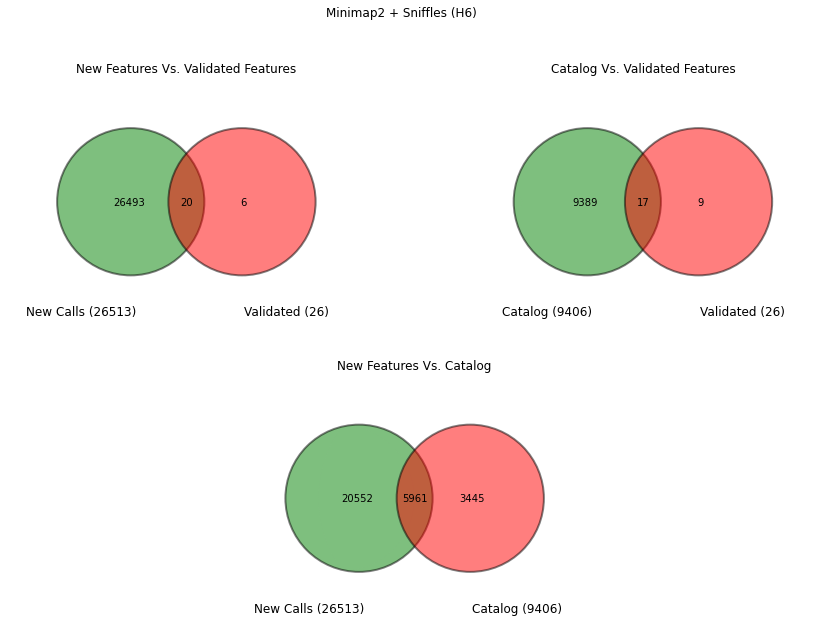

In [39]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + Sniffles (H6)", minimap2_sniffles_ins, catalog_ins, validated_ins1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()

## H7 Insertions of repeat sequence:


new: 26513 validated: 59 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
2	62472119	62472120	250
5	73058579	73058661	large
6	109428539	109428543	>2000
7	61411552	61411553	large
7	5185009	5185060	>2000
8	41795413	41795414	large
8	30341584	30341690	>2000
9	34980283	34980284	1200
10	46770576	46770577	large
10	120231460	120231463	250
11	30326537	30326636	>2000
14	87621265	87621269	>2000
16	44402206	44402207	large
16	14340377	14340394	>2000
17	42775169	42775189	>2000
17	89864796	89864821	>2000

Validated vs Previous (INS)======>:
1	150030739	150030740	1000
1	160055087	160055088	197
3	69514492	69514537	125
4	55297691	55297987	400/300
6	95014172	95014197	250
7	16143911	16144013	125
8	30341584	30341690	>2000
9	98348249	98348250	551
17	42775169	42775189	>2000

New vs Previous (INS - Head())======>:
1	3766453	3766495	2
 1	3948171	3948213	2
 1	4041437	4041479	2
 1	4221936	4221978	2
 1	4621047	4621089	2
 1	4664817	4664859	2
 1	5145111	5145153	2
 1	5900949	5900991	2
 1	611162

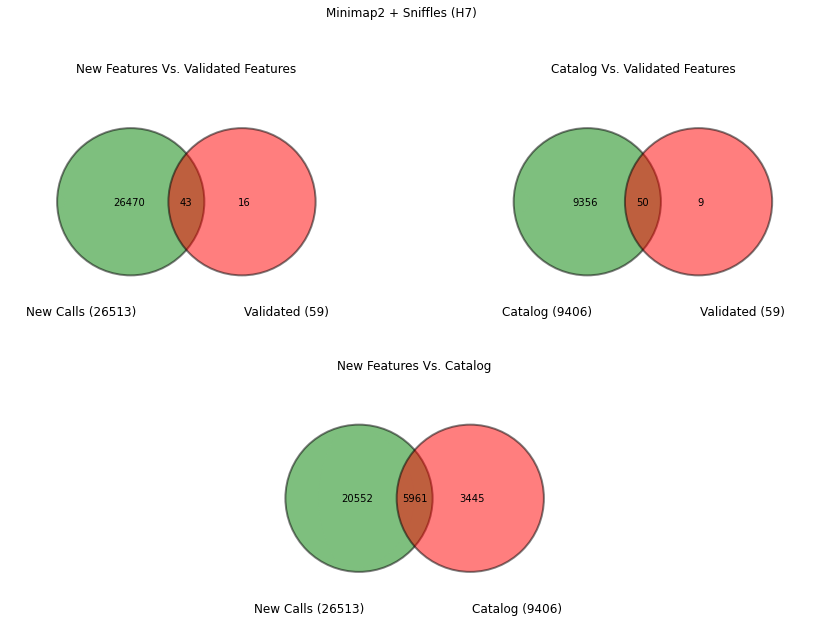

In [40]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + Sniffles (H7)", minimap2_sniffles_ins, catalog_ins, validated_ins2, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()

## H1 Deletions of unique sequence

new: 25923 validated: 78 catalog:17540

Output data intersect -v:
Validated vs New (DEL)======>:
1	8297250	8299011	1762
2	123201215	123201492	278
2	162318230	162318300	71
4	118459742	118462287	2546
5	101021103	101021194	92
9	105647016	105647691	676
10	18243681	18248375	4695
10	106817192	106817301	110
11	27327671	27328146	476
12	26363795	26363855	61
13	116290261	116290750	490
13	116290278	116290730	453
19	11928896	11928988	93

Validated vs Previous (DEL)======>:
2	162318230	162318300	71
4	114022094	114023640	1547
5	101021103	101021194	92
8	30958463	30958545	83
8	30958463	30958545	83
10	82421207	82423382	2176
12	26363795	26363855	61
12	26405593	26405656	64
19	11928896	11928988	93

New vs Previous (DEL - Head())======>:
1	4756745	4756948	203
 1	5853450	5854192	742
 1	6138143	6143143	5000
 1	6187020	6187198	178
 1	6588061	6588303	242
 1	7546813	7552327	5514
 1	8063930	8071041	7111
 1	8279721	8292529	12808
 1	8297253	8299016	1763
 1	8304862	8310952	6090
 

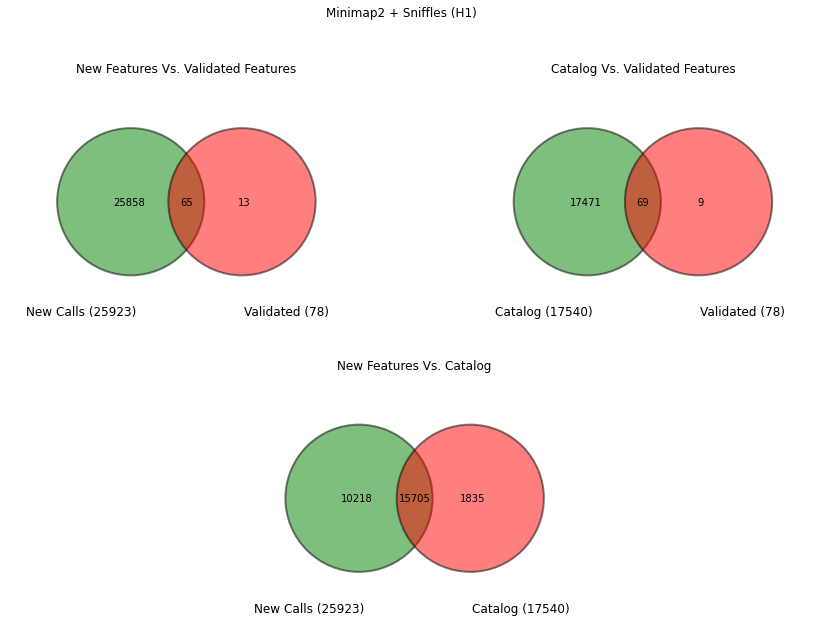

In [41]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + Sniffles (H1)", minimap2_sniffles_del, catalog_del, validated_del1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))


print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

## H2 Deletions of repeat sequence

new: 25923 validated: 96 catalog:17540

Output data intersect -v:
Validated vs New (DEL)======>:
2	100001511	100005949	4439
3	74707393	74708406	1014
4	111915048	111921270	6223
4	111921941	111928150	6210
4	138428813	138429350	538
10	89890849	89896109	5261
12	26394392	26394508	117
12	37197790	37202026	4237
12	37204757	37211564	6808
19	10708846	10708896	51
19	10721808	10721859	52
19	10742540	10742592	53
19	10742540	10742592	53
19	11926616	11926713	98
19	11928436	11928492	57

Validated vs Previous (DEL)======>:
8	19166321	19170053	3733
11	28919029	28925370	6342
12	26394392	26394508	117
17	78341783	78342639	856
19	10708846	10708896	51
19	10721808	10721859	52
19	10742540	10742592	53
19	10742540	10742592	53
19	11926616	11926713	98
19	11928436	11928492	57
19	12181820	12181878	59

New vs Previous (DEL - Head())======>:
1	4756745	4756948	203
 1	5853450	5854192	742
 1	6138143	6143143	5000
 1	6187020	6187198	178
 1	6588061	6588303	242
 1	7546813	7552327	5514
 1	8063930	8071041	7111
 1	8279721	8292

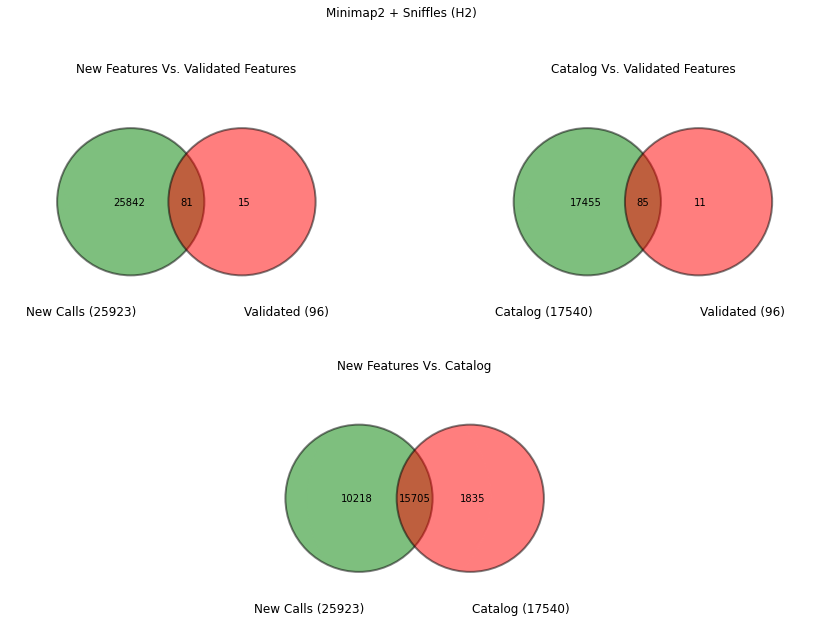

In [42]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + Sniffles (H2)", minimap2_sniffles_del, catalog_del, validated_del2, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))


print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

# Minimap2 + pbsv


## H6 Insertions of unique sequence (de novo sequence):

new: 61413 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
6	145486712	145486713	500
7	98768784	98768785	550
8	73207739	73207740	1000

Validated vs Previous (INS)======>:
3	149017827	149017828	100
4	108451404	108451405	100/200
6	145486712	145486713	500
7	98768784	98768785	550
8	73207739	73207740	1000
8	109550435	109550436	150
9	41311250	41311251	50
12	109926718	109926719	50
19	38036363	38036364	178

New vs Previous (INS - Head())======>:
1	3766453	3766495	2
 1	3948171	3948213	2
 1	5145111	5145153	2
 1	6243680	6243722	2
 1	7384789	7384831	2
 1	8256044	8256086	2
 1	9077925	9077967	2
 1	9705670	9705712	2
 1	10931296	10931338	2
 1	11590866	11590908	2
 

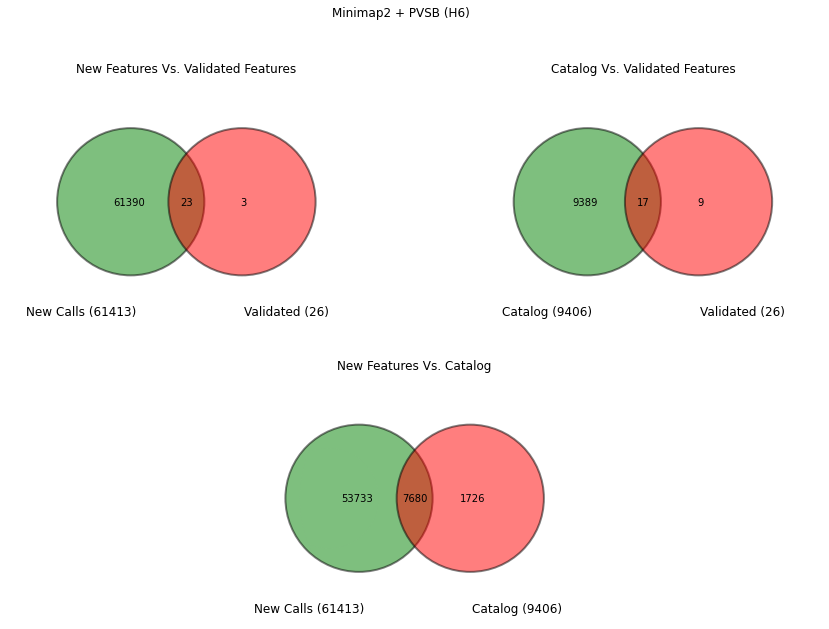

In [6]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + PVSB (H6)", minimap2_pbsv_ins, catalog_ins, validated_ins1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()


# new_vs_validated.saveas(intersects_dir + '/INS_pbsv_vs_H6.bed')
# catalog_vs_validated.saveas(intersects_dir + '/INS_catalog_vs_H6.bed')
# new_vs_catalog.saveas(intersects_dir + '/INS_pbsv_vs_catalog.bed')

## H7 Insertions of unique sequence (de novo sequence):

new: 61413 validated: 59 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
2	62472119	62472120	250
7	61411552	61411553	large
8	41795413	41795414	large
9	34980283	34980284	1200
10	46770576	46770577	large
17	42775169	42775189	>2000
17	89864796	89864821	>2000

Validated vs Previous (INS)======>:
1	150030739	150030740	1000
1	160055087	160055088	197
3	69514492	69514537	125
4	55297691	55297987	400/300
6	95014172	95014197	250
7	16143911	16144013	125
8	30341584	30341690	>2000
9	98348249	98348250	551
17	42775169	42775189	>2000

New vs Previous (INS - Head())======>:
1	3766453	3766495	2
 1	3948171	3948213	2
 1	5145111	5145153	2
 1	6243680	6243722	2
 1	7384789	7384831	2
 1	8256044	8256086	2
 1	9077925	9077967	2
 1	9705670	9705712	2
 1	10931296	10931338	2
 1	11590866	11590908	2
 

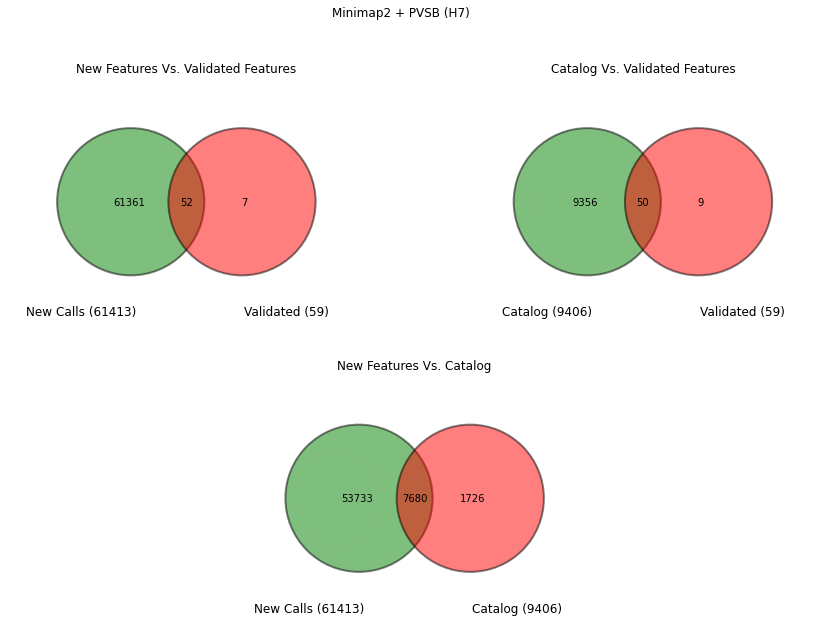

In [7]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + PVSB (H7)",minimap2_pbsv_ins, catalog_ins, validated_ins2, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()


# new_vs_validated.saveas(intersects_dir + '/INS_pbsv_vs_H7.bed')
# catalog_vs_validated.saveas(intersects_dir + '/INS_catalog_vs_H7.bed')
# new_vs_catalog.saveas(intersects_dir + '/INS_pbsv_vs_catalog.bed')

## H1 Deletions of unique sequence

new: 72613 validated: 78 catalog:17540
Validated vs New (DEL)======>:
1	8297250	8299011	1762
12	26363795	26363855	61
19	11928896	11928988	93

Validated vs Previous (DEL)======>:
2	162318230	162318300	71
4	114022094	114023640	1547
5	101021103	101021194	92
8	30958463	30958545	83
8	30958463	30958545	83
10	82421207	82423382	2176
12	26363795	26363855	61
12	26405593	26405656	64
19	11928896	11928988	93

New vs Previous (DEL - Head())======>:
1	5853450	5854192	742
 1	6138143	6143143	5000
 1	6215214	6221457	6243
 1	6588061	6588303	242
 1	8297253	8299016	1763
 1	16107217	16107854	637
 1	17346090	17346905	815
 1	18750666	18750876	210
 1	21265542	21272604	7062
 1	24127530	24128832	1302
 

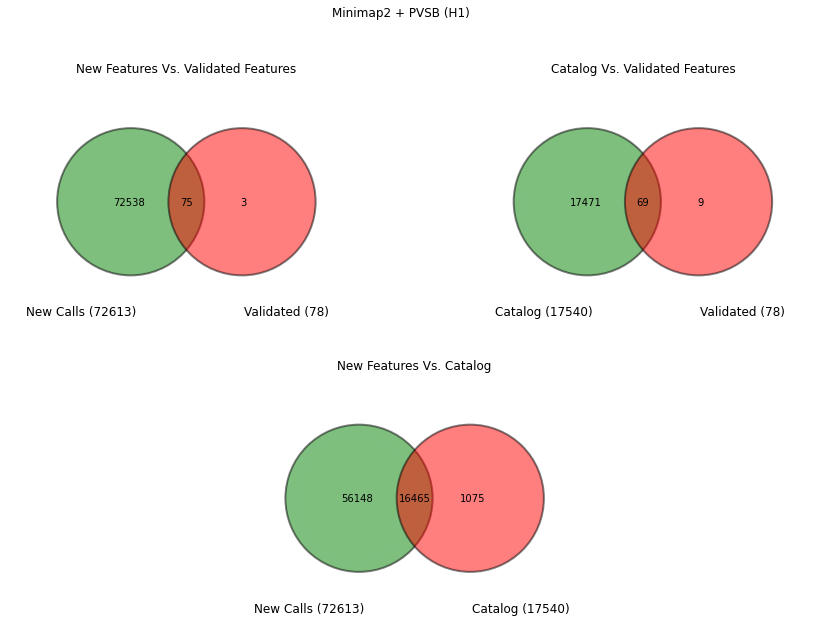

In [8]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + PVSB (H1)",minimap2_pbsv_del, catalog_del, validated_del1, True, True)

print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

# new_vs_validated.saveas(intersects_dir + '/DEL_pbsv_vs_H1.bed')
# catalog_vs_validated.saveas(intersects_dir + '/DEL_catalog_vs_H1.bed')
# new_vs_catalog.saveas(intersects_dir + '/DEL_pbsv_vs_catalog.bed')

## H2 Deletions of unique sequence

new: 30346 validated: 96 catalog:17540

Output data intersect -v:
Validated vs New (DEL)======>:
4	111915048	111921270	6223
4	111921941	111928150	6210
7	98946651	98949288	2638
7	98946651	98949288	2638
11	28919029	28925370	6342
12	26394392	26394508	117
19	10708846	10708896	51
19	10721808	10721859	52
19	10742540	10742592	53
19	10742540	10742592	53
19	11926616	11926713	98
19	11928436	11928492	57

Validated vs Previous (DEL)======>:
8	19166321	19170053	3733
11	28919029	28925370	6342
12	26394392	26394508	117
17	78341783	78342639	856
19	10708846	10708896	51
19	10721808	10721859	52
19	10742540	10742592	53
19	10742540	10742592	53
19	11926616	11926713	98
19	11928436	11928492	57
19	12181820	12181878	59

New vs Previous (DEL - Head())======>:
1	5853450	5854192	742
 1	6138143	6143143	5000
 1	6215214	6221457	6243
 1	6588061	6588303	242
 1	8297253	8299016	1763
 1	16107217	16107854	637
 1	17346090	17346905	815
 1	18706344	18707888	1544
 1	18750666	18750876	210
 1	21265542	21272604	7062
 

<BedTool(../../data/DBA2J/bed/50/intersects/DEL_catalog_vs_H2.bed)>

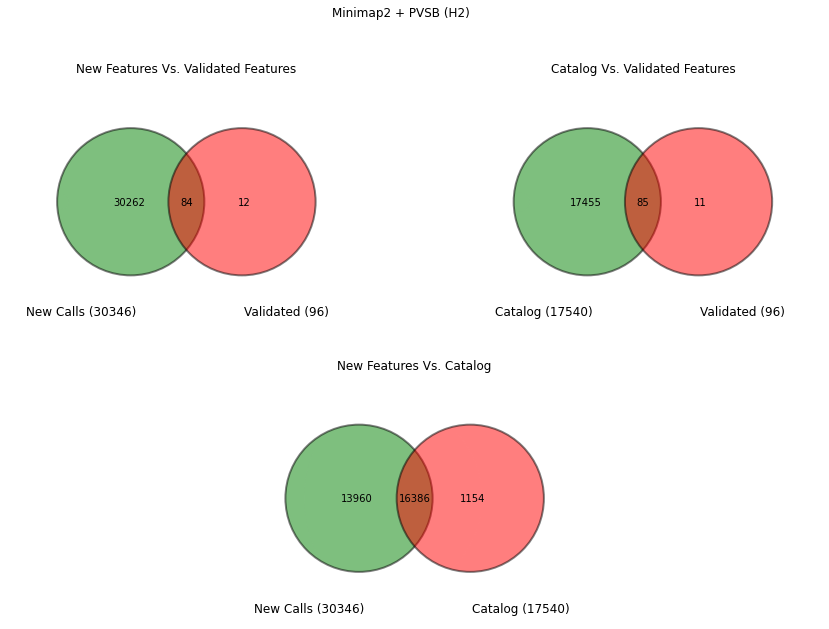

In [46]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("Minimap2 + PVSB (H2)",minimap2_pbsv_del, catalog_del, validated_del2, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

new_vs_validated.saveas(intersects_dir + '/DEL_pbsv_vs_H2.bed')
catalog_vs_validated.saveas(intersects_dir + '/DEL_catalog_vs_H2.bed')
#new_vs_catalog.saveas(intersects_dir + '/DEL_pbsv_vs_catalog.bed')

# NGMLR + Sniffles


## Insertions

new: 25171 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (INS)======>:
4	108451404	108451405	100/200
6	145486712	145486713	500
7	98768784	98768785	550
8	73207739	73207740	1000
12	109926718	109926719	50

Validated vs Previous (INS)======>:
3	149017827	149017828	100
4	108451404	108451405	100/200
6	145486712	145486713	500
7	98768784	98768785	550
8	73207739	73207740	1000
8	109550435	109550436	150
9	41311250	41311251	50
12	109926718	109926719	50
19	38036363	38036364	178

New vs Previous (INS - Head())======>:
1	3766453	3766495	2
 1	3948171	3948213	2
 1	4221936	4221978	2
 1	5145111	5145153	2
 1	5900949	5900991	2
 1	6045051	6045093	2
 1	6176975	6177028	13
 1	6243680	6243722	2
 1	7925489	7925531	2
 1	8256044	8256086	2
 

<BedTool(../../data/DBA2J/bed/50/intersects/INS_ngmlr_vs_catalog.bed)>

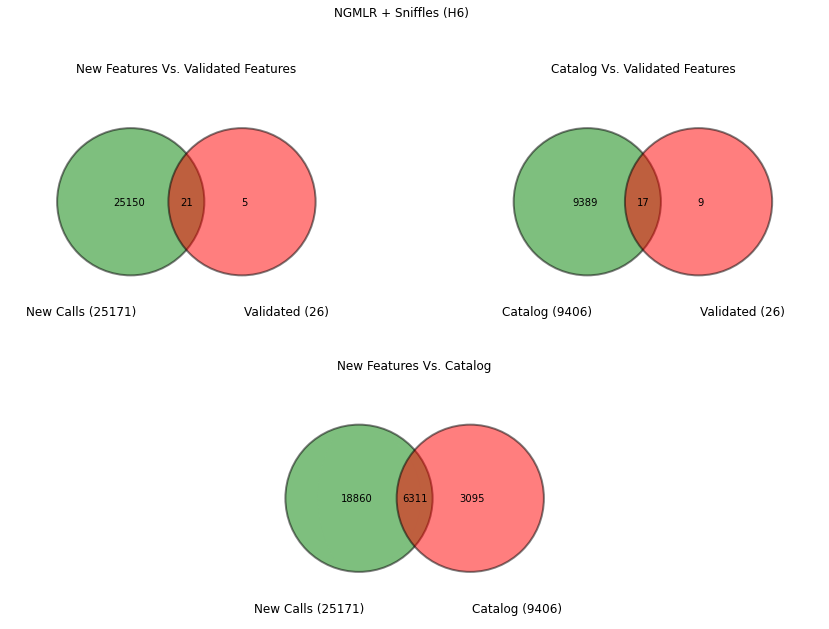

In [47]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("NGMLR + Sniffles (H6)", ngmlr_sniffles_ins, catalog_ins, validated_ins1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (INS)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (INS)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (INS - Head())======>:")
new_vs_catalog.head()

new_vs_validated.saveas(intersects_dir + '/INS_ngmlr_vs_validated.bed')
catalog_vs_validated.saveas(intersects_dir + '/INS_catalog_vs_validated.bed')
new_vs_catalog.saveas(intersects_dir + '/INS_ngmlr_vs_catalog.bed')

## Deletions

new: 25298 validated: 26 catalog:9406

Output data intersect -v:
Validated vs New (DEL)======>:
1	175194279	175194280	203
2	74923175	74923176	383
3	149017827	149017828	100
4	49677490	49677491	137
4	108451404	108451405	100/200
6	145486712	145486713	500
7	74095624	74095625	950
7	98646351	98646352	1000/1500
7	98768784	98768785	550
8	109550435	109550436	150
9	41311250	41311251	50
9	69876473	69876480	650
10	124034632	124034633	252
12	109926718	109926719	50
12	28563054	28563056	353
12	92789824	92789845	587
13	47269693	47269694	298
15	20258172	20258173	150
15	67999841	67999869	1150
17	24186569	24186570	256
17	34565710	34565711	629

Validated vs Previous (DEL)======>:
3	149017827	149017828	100
4	108451404	108451405	100/200
6	145486712	145486713	500
7	98768784	98768785	550
8	73207739	73207740	1000
8	109550435	109550436	150
9	41311250	41311251	50
12	109926718	109926719	50
19	38036363	38036364	178

New vs Previous (DEL - Head())======>:
1	3318967	3319034	27
 1	3582656	3582698	2
 1	3766453	3766495

<BedTool(../../data/DBA2J/bed/50/intersects/DEL_ngmlr_vs_catalog.bed)>

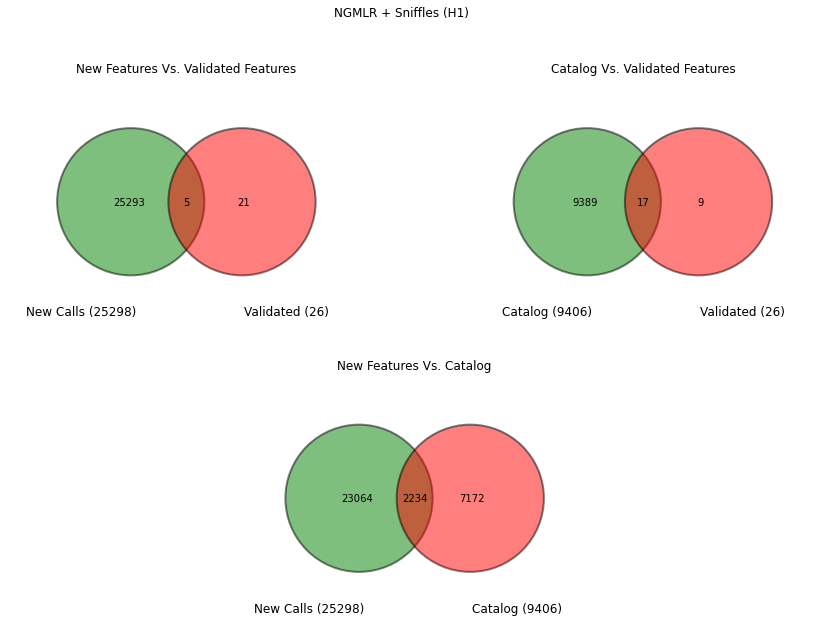

In [48]:
new_vs_validated, catalog_vs_validated, new_vs_catalog = plot3("NGMLR + Sniffles (H1)", ngmlr_sniffles_del, catalog_ins, validated_ins1, True, True)

print("\nOutput data intersect -v:")
print("Validated vs New (DEL)======>:\n" + str(new_vs_validated))

print("Validated vs Previous (DEL)======>:\n" + str(catalog_vs_validated))

print("New vs Previous (DEL - Head())======>:")
new_vs_catalog.head()

new_vs_validated.saveas(intersects_dir + '/DEL_ngmlr_vs_validated.bed')
catalog_vs_validated.saveas(intersects_dir + '/DEL_catalog_vs_validated.bed')
new_vs_catalog.saveas(intersects_dir + '/DEL_ngmlr_vs_catalog.bed')